In [1]:
!git clone https://github.com/congnghia0609/ntc-scv.git

Cloning into 'ntc-scv'...
Updating files: 100% (11/11)
Updating files: 100% (11/11), done.


## Reading data

In [1]:
import os
import pandas as pd

def load_data_from_path(folder_path):
    examples = []
    for label in os.listdir(folder_path):
        full_path = os.path.join(folder_path, label)
        for file_name in os.listdir(full_path):
            file_path = os.path.join(full_path, file_name)
            with open(file_path, "r", encoding="utf-8") as f:
                lines = f.readlines()
            sentence = " ".join(lines)
            if label == "neg":
                label = 0
            if label == "pos":
                label = 1
            data = {
                'sentence': sentence,
                'label': label
            }
            examples.append(data)
    return pd.DataFrame(examples)   
    

In [2]:
folder_paths = {
    'train': './data/ntc-scv/data_train/train',
    'valid': './data/ntc-scv/data_train/test',
    'test': './data/ntc-scv/data_test/test'
}

train_df = load_data_from_path(folder_paths['train'])
valid_df = load_data_from_path(folder_paths['valid'])
test_df = load_data_from_path(folder_paths['test'])

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  30000 non-null  object
 1   label     30000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 468.9+ KB


In [4]:
train_df.head()

,sentence,label
0,Mua có mỗi Bingsu thập_cẩm 45k mà mình f đợi h...,0
1,Thứ 6 nào ta cùng quẩy 💣 💣 💣\n Vuvuzela beer c...,0
2,"Mình đi với nhóm , tổng_cộng 4 người ăn chỉ có...",0
3,"nhân_viên phục_vụ không mấy tận_tình , đồ_ăn r...",0
4,"Vào đây thì hết bàn , nhưng mình vẫn ngồi đợi ...",0


In [5]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  10000 non-null  object
 1   label     10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  10000 non-null  object
 1   label     10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


## EDA with full dataset

### Dataset
This dataset includes 50000 rows total and just 1 feature variable as `sentence`. The target variable is label with 0 as negative and 1 as positive

In [7]:
full_df = pd.concat([train_df, valid_df, test_df], ignore_index=True)
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  50000 non-null  object
 1   label     50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [9]:
full_df.head()

,sentence,label
0,Mua có mỗi Bingsu thập_cẩm 45k mà mình f đợi h...,0
1,Thứ 6 nào ta cùng quẩy 💣 💣 💣\n Vuvuzela beer c...,0
2,"Mình đi với nhóm , tổng_cộng 4 người ăn chỉ có...",0
3,"nhân_viên phục_vụ không mấy tận_tình , đồ_ăn r...",0
4,"Vào đây thì hết bàn , nhưng mình vẫn ngồi đợi ...",0


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
full_df.isnull().sum() # there is no missing value

sentence    0
label       0
dtype: int64

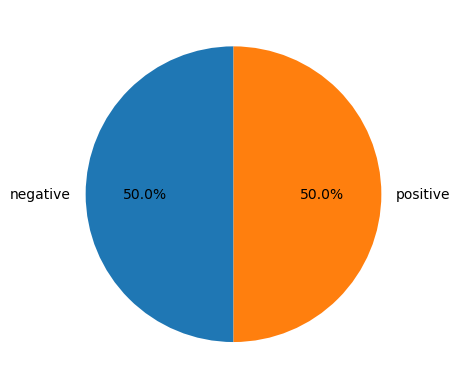

In [12]:
plt.pie(full_df['label'].value_counts(), labels=['negative', 'positive'], autopct='%1.1f%%', startangle=90)
plt.show()

### Starting EDA section by checking how long the reviews 

In [13]:
def word_count(sentence):
    return len(sentence.split())

full_df['Word_count'] = full_df['sentence'].apply(word_count)
full_df['Char_count'] = full_df['sentence'].apply(len)

In [17]:
full_df

,sentence,label,Word_count,Char_count
0,Mua có mỗi Bingsu thập_cẩm 45k mà mình f đợi h...,0,59,227
1,Thứ 6 nào ta cùng quẩy 💣 💣 💣\n Vuvuzela beer c...,0,165,706
2,"Mình đi với nhóm , tổng_cộng 4 người ăn chỉ có...",0,95,440
3,"nhân_viên phục_vụ không mấy tận_tình , đồ_ăn r...",0,30,138
4,"Vào đây thì hết bàn , nhưng mình vẫn ngồi đợi ...",0,91,429
...,...,...,...,...
49995,"Gia re , mon an ngon , view dep va nhan vien n...",1,20,77
49996,"Quán nằm trên đường Thạch_Thị_Thanh , dễ tìm ....",1,43,231
49997,Mình đã đến ăn_ở quán này vài lần . Đồ_ăn ngon...,1,64,307
49998,Nhà_hàng trang_trí độc_đáo .\n Món ăn mới_lạ n...,1,18,98


In [18]:
import nltk
from nltk import tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
full_df['Mean_word_length'] = full_df['Char_count'] / full_df['Word_count']

In [20]:
full_df

,sentence,label,Word_count,Char_count,Mean_word_length
0,Mua có mỗi Bingsu thập_cẩm 45k mà mình f đợi h...,0,59,227,3.847458
1,Thứ 6 nào ta cùng quẩy 💣 💣 💣\n Vuvuzela beer c...,0,165,706,4.278788
2,"Mình đi với nhóm , tổng_cộng 4 người ăn chỉ có...",0,95,440,4.631579
3,"nhân_viên phục_vụ không mấy tận_tình , đồ_ăn r...",0,30,138,4.600000
4,"Vào đây thì hết bàn , nhưng mình vẫn ngồi đợi ...",0,91,429,4.714286
...,...,...,...,...,...
49995,"Gia re , mon an ngon , view dep va nhan vien n...",1,20,77,3.850000
49996,"Quán nằm trên đường Thạch_Thị_Thanh , dễ tìm ....",1,43,231,5.372093
49997,Mình đã đến ăn_ở quán này vài lần . Đồ_ăn ngon...,1,64,307,4.796875
49998,Nhà_hàng trang_trí độc_đáo .\n Món ăn mới_lạ n...,1,18,98,5.444444


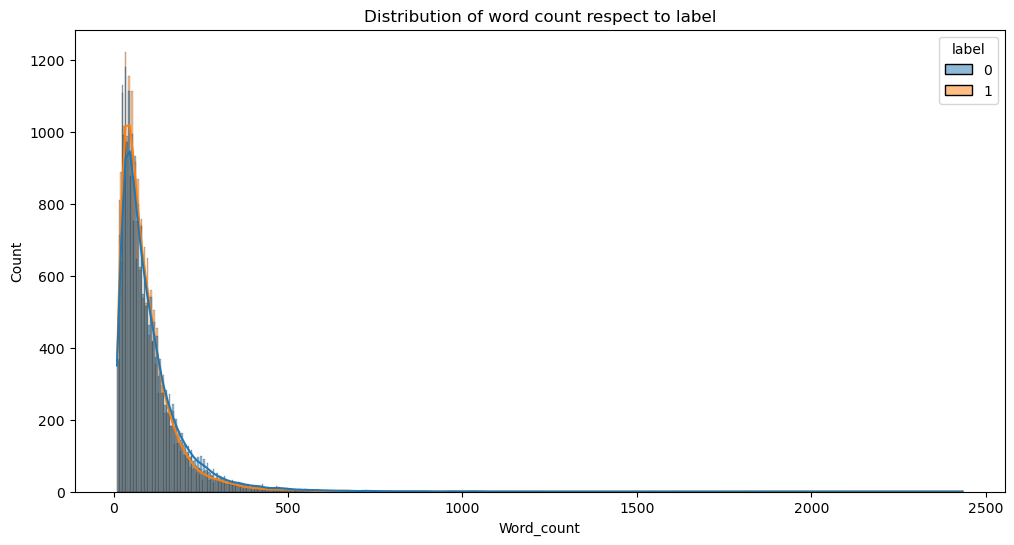

In [21]:
## Plot the distribution of word count respect to label 
plt.figure(figsize=(12, 6))
sns.histplot(data=full_df, x='Word_count', hue='label', kde=True)
plt.title('Distribution of word count respect to label')
plt.show()

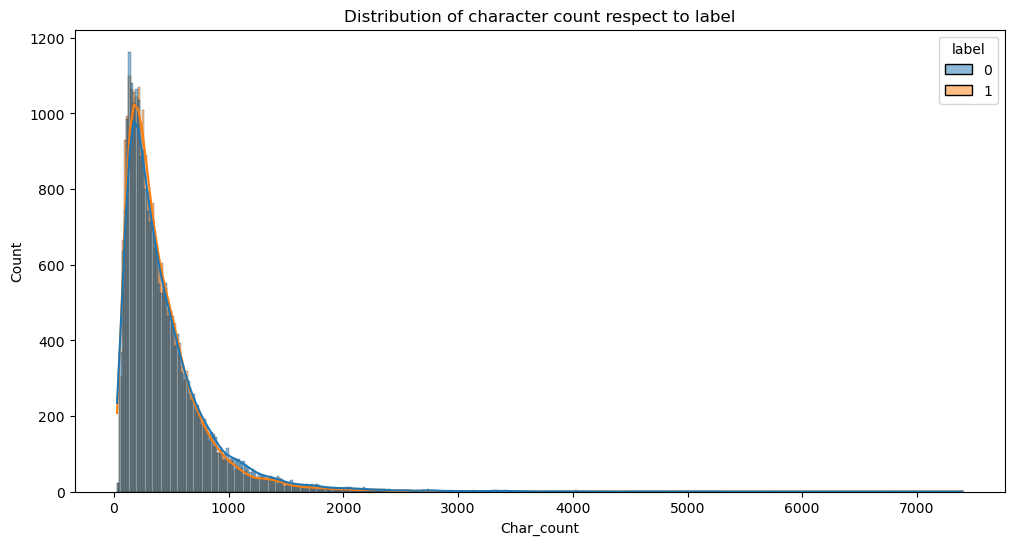

In [43]:
# Plot the distribution of character count respect to label
plt.figure(figsize=(12, 6))
sns.histplot(data=full_df, x='Char_count', hue='label', kde=True)
plt.title('Distribution of character count respect to label')
plt.show()

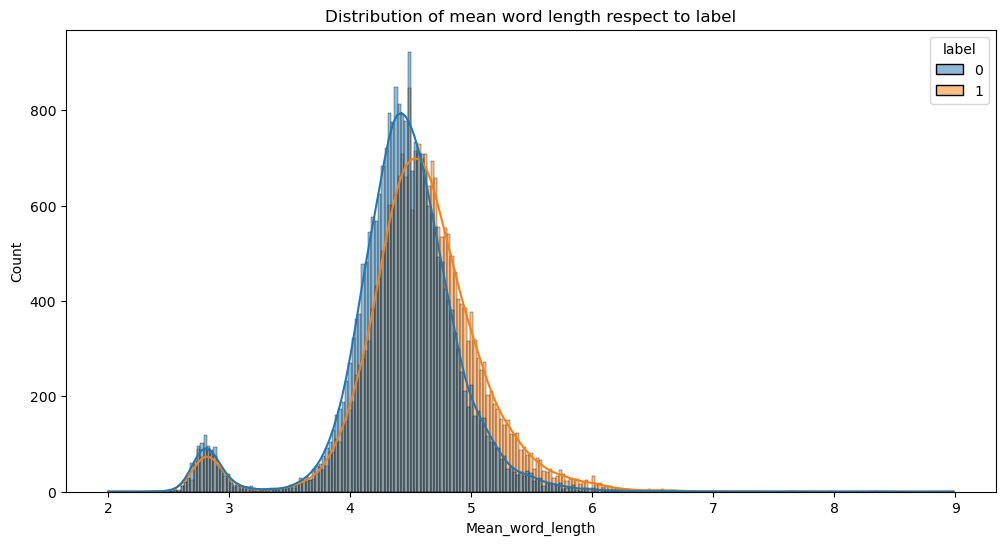

In [23]:
# Plot the mean word length respect to label
plt.figure(figsize=(12, 6))
sns.histplot(data=full_df, x='Mean_word_length', hue='label', kde=True)
plt.title('Distribution of mean word length respect to label')
plt.show()

In [24]:
!pip install langdetect
from langdetect import detect


     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     ---------- ----------------------------- 262.1/981.5 kB ? eta -:--:--
     ---------- ----------------------------- 262.1/981.5 kB ? eta -:--:--
     ---------- ----------------------------- 2

### Explore how many languages exists in dataset

In [28]:
full_df['language'] = full_df['sentence'].apply(detect)
languages = full_df['language'].nunique()

In [27]:
print(f'There are {languages} languages in the dataset')

There are 15 languages in the dataset


### As seen, there are 15 distinct languages detected, we are working on Vietnammese dataset so we need to delete all reviews which is not Vietnammese

In [29]:
!pip install langid

     ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
     ----- ---------------------------------- 0.3/1.9 MB ? eta -:--:--
     ----- ---------------------------------- 0.3/1.9 MB ? eta -:--:--
     -

In [30]:
from langid.langid import LanguageIdentifier, model
def identify_VN(df):
    identifier = LanguageIdentifier.from_modelstring(model, norm_probs=True)
    not_vi = set()
    THRESHOLD = 0.9
    for idx, row in df.iterrows():
        lang, score = identifier.classify(row['sentence'])
        if lang != 'vi' or (lang == 'vi' and score < THRESHOLD):
            not_vi.add(idx)
    
    vi_df = df[~df.index.isin(not_vi)]
    not_vi_df = df[df.index.isin(not_vi)]
    return vi_df, not_vi_df

In [32]:
full_df.drop(columns=['language', 'Word_count', 'Char_count', 'Mean_word_length'], inplace=True)

In [33]:
full_df

,sentence,label
0,Mua có mỗi Bingsu thập_cẩm 45k mà mình f đợi h...,0
1,Thứ 6 nào ta cùng quẩy 💣 💣 💣\n Vuvuzela beer c...,0
2,"Mình đi với nhóm , tổng_cộng 4 người ăn chỉ có...",0
3,"nhân_viên phục_vụ không mấy tận_tình , đồ_ăn r...",0
4,"Vào đây thì hết bàn , nhưng mình vẫn ngồi đợi ...",0
...,...,...
49995,"Gia re , mon an ngon , view dep va nhan vien n...",1
49996,"Quán nằm trên đường Thạch_Thị_Thanh , dễ tìm ....",1
49997,Mình đã đến ăn_ở quán này vài lần . Đồ_ăn ngon...,1
49998,Nhà_hàng trang_trí độc_đáo .\n Món ăn mới_lạ n...,1


In [34]:
full_df, not_vi_df = identify_VN(full_df)

In [36]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49577 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  49577 non-null  object
 1   label     49577 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [37]:
# process train_df, valid_df, test_df
train_df, not_vi_train_df = identify_VN(train_df)
valid_df, not_vi_valid_df = identify_VN(valid_df)
test_df, not_vi_test_df = identify_VN(test_df)

### As the normal pipeline preprocessing for text data, we also need to remove HTML tags, special character, emoji,... which are not usefull for model work well

In [40]:
!pip install emoji
import re
import string
import emoji

   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ---

In [41]:
viet_luong_dict = {
    "ko": "không", "k": "không", "hok": "không", "j": "gì",
    "tl": "trả lời", "ntn": "như thế nào", "vkl": "rất",
    "cx": "cũng", "z": "d", "thik": "thích"
}


def replace_teencode(text):
    words = text.split()
    return " ".join([viet_luong_dict[word] if word in viet_luong_dict else word for word in words])

def preprocess_text(text):
    text = text.lower()
    
    text = replace_teencode(text)
    
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text = url_pattern.sub(r" ", text)
    
    html_pattern = re.compile(r'<.*?>')
    text = html_pattern.sub(r" ", text)
    
    text = emoji.demojize(text)
    
    text = " ".join(text.split())
    return text
    
    

In [42]:
train_df['sentence'] = train_df['sentence'].apply(preprocess_text)
valid_df['sentence'] = valid_df['sentence'].apply(preprocess_text)
test_df['sentence'] = test_df['sentence'].apply(preprocess_text)
full_df['sentence'] = full_df['sentence'].apply(preprocess_text)

C:\Users\PC\AppData\Local\Temp\ipykernel_32180\628311157.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['sentence'] = full_df['sentence'].apply(preprocess_text)


In [43]:
full_df

,sentence,label
0,mua có mỗi bingsu thập_cẩm 45k mà mình f đợi h...,0
1,thứ 6 nào ta cùng quẩy :bomb: :bomb: :bomb: vu...,0
2,"mình đi với nhóm , tổng_cộng 4 người ăn chỉ có...",0
3,"nhân_viên phục_vụ không mấy tận_tình , đồ_ăn r...",0
4,"vào đây thì hết bàn , nhưng mình vẫn ngồi đợi ...",0
...,...,...
49994,"- quán này mới khai_trương được 1 tuần , nằm n...",1
49996,"quán nằm trên đường thạch_thị_thanh , dễ tìm ....",1
49997,mình đã đến ăn_ở quán này vài lần . đồ_ăn ngon...,1
49998,nhà_hàng trang_trí độc_đáo . món ăn mới_lạ nhi...,1


## Embedding columns into vector

In [57]:
import pyvi
from pyvi import ViTokenizer
def vn_tokenizer(text):
    return ViTokenizer.tokenize(text).split()

In [58]:
test = "Tôi là sinh viên trường Đại học Bách Khoa HCM"
vn_tokenizer(test)

['Tôi', 'là', 'sinh_viên', 'trường', 'Đại_học', 'Bách_Khoa_HCM']

In [59]:
def yield_tokens(sentences, tokenize):
    for sentence in sentences:
        yield tokenize(sentence)

In [62]:
# for build vocab
from torchtext.vocab import build_vocab_from_iterator

In [64]:
vocab_size = 1000
vocabulary = build_vocab_from_iterator(yield_tokens(full_df['sentence'], vn_tokenizer), min_freq=2, specials=['<unk>', '<pad>'], special_first=True, max_tokens=vocab_size)
vocabulary.set_default_index(vocabulary['<unk>'])

In [65]:
vocab_size = 1000
vocabulary = build_vocab_from_iterator(yield_tokens(train_df['sentence'], vn_tokenizer), min_freq=2, specials=['<unk>', '<pad>'], special_first=True, max_tokens=vocab_size)
vocabulary.set_default_index(vocabulary['<unk>'])

In [66]:
# convert iter to torchtext dataset
from torchtext.data.functional import to_map_style_dataset
def prepare_dataset(df):
    for idx, row in df.iterrows():
        sentence = row['sentence']
        encoded_sentence = vocabulary(vn_tokenizer(sentence))
        label = row['label']
        yield (encoded_sentence, label)
        
train_dataset = to_map_style_dataset(prepare_dataset(train_df))
valid_dataset = to_map_style_dataset(prepare_dataset(valid_df))

In [69]:
train_dataset.__getitem__(0)

([130,
  7,
  190,
  851,
  921,
  0,
  23,
  4,
  0,
  225,
  78,
  624,
  368,
  3,
  176,
  27,
  11,
  301,
  626,
  7,
  482,
  0,
  263,
  258,
  93,
  756,
  368,
  60,
  104,
  331,
  539,
  0,
  661,
  104,
  3,
  4,
  5,
  133,
  7,
  14,
  5,
  0,
  13,
  159,
  6,
  96,
  3,
  0,
  301,
  9,
  19,
  0,
  236,
  0,
  12,
  605,
  230,
  77,
  3],
 0)

In [70]:
import torch
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

def collate_batch(batch):
    encoded_sentences, labels = [], []
    for encoded_sentence, label in batch:
        labels.append(label)
        encoded_sentence = torch.tensor(encoded_sentence, dtype=torch.int64)
        encoded_sentences.append(encoded_sentence)
    labels = torch.tensor(labels, dtype=torch.int64)
    encoded_sentences = pad_sequence(encoded_sentences, padding_value=vocabulary['<pad>'])
    return encoded_sentences, labels


batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_batch)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_batch)

In [71]:
next(train_loader.__iter__())

(tensor([[337, 392, 107,  ..., 111,  68,   4],
         [ 80,  25,  15,  ..., 419,  86,  65],
         [ 71,  21,  64,  ..., 271,  10, 271],
         ...,
         [  1,   1,   1,  ...,   1,   1,   1],
         [  1,   1,   1,  ...,   1,   1,   1],
         [  1,   1,   1,  ...,   1,   1,   1]]),
 tensor([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
         1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
         1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
         0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
         0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
         0, 1, 0, 1, 1, 0, 0, 1]))

## Model TextCNN

In [72]:
import torch.nn as nn
import torch.nn.functional as F
class TextCNN(nn.Module):
    def __init__(self, vocab_size, embed_size, kernel_size, num_filters, num_classes):
        super(TextCNN, self).__init__()
        self.vocab_size = vocab_size
        self.embed_size = embed_size
        self.num_filters = num_filters
        self.num_classes = num_classes
        self.embedding = nn.Embedding(self.vocab_size, self.embed_size, padding_idx=0)
        self.conv = nn.ModuleList([
            nn.Conv1d(in_channels=embed_size,
                      out_channels=num_filters,
                      kernel_size=k,
                      stride = 1)
            for k in  kernel_size
        ])
        self.fc = nn.Linear(len(kernel_size) * num_filters, num_classes)
    def forward(self, x):
        batch_size, sequence_length = x.shape
        x = self.embedding(x.T).transpose(1, 2)
        x = [F.relu(conv(x)) for conv in self.conv]
        x = [F.max_pool1d(i, i.size(-1)).squeeze(-1) for i in x]
        x = torch.cat(x, dim=1)
        x = self.fc(x)
        return x

In [73]:
import time
def train(model, optimizer, criterion, train_loader, device, epoch = 0, log_interval = 50):
    model.train()
    total_acc, total_count = 0, 0
    losses = []
    start_time = time.time()    
    for idx, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        predictions = model(inputs)
        loss = criterion(predictions, labels)
        loss.backward()
        
        optimizer.step()
        total_acc += (predictions.argmax(1) == labels).sum().item()
        total_count += labels.size(0)
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches | accuracy {:8.3f}'.format(epoch, idx, len(train_loader), total_acc/total_count))
            losses.append(loss.item())
            total_acc, total_count = 0, 0
            start_time = time.time()
    epoch_acc = total_acc / total_count
    epoch_loss = np.mean(losses)
    return epoch_acc, epoch_loss

In [74]:
def evaluate(model, criterion, valid_loader, device):
    model.eval()
    total_acc, total_count = 0, 0
    losses = []
    with torch.no_grad():
        for idx, (inputs, labels) in enumerate(valid_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            predictions = model(inputs)
            loss = criterion(predictions, labels)
            losses.append(loss.item())
            total_acc += (predictions.argmax(1) == labels).sum().item()
            total_count += labels.size(0)
    epoch_acc = total_acc / total_count
    epoch_loss = sum(losses) / len(losses)
    return epoch_acc, epoch_loss

In [75]:
import torch.optim as optim
num_class = train_df['label'].nunique()
vocab_size = len(vocabulary)
embedding_dim = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = TextCNN(
    vocab_size=vocab_size,
    embed_size=embedding_dim,
    kernel_size=[2, 3, 4],
    num_filters=100,
    num_classes=num_class
)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [77]:
num_epochs = 20
save_model = "./modelTextCNN"

train_accs, train_losses = [], []
valid_accs, valid_losses = [], []
best_loss_eval = float('inf')

for epoch in range(num_epochs):
    epoch_start_time = time.time()
    train_acc, train_loss = train(model, optimizer, criterion, train_loader, device, epoch)
    train_accs.append(train_acc)
    train_losses.append(train_loss)
    
    # evaluate
    eval_acc, eval_loss = evaluate(model, criterion, valid_loader, device)
    valid_accs.append(eval_acc)
    valid_losses.append(eval_loss)
    
    # save best model
    if eval_loss < best_loss_eval:
        best_loss_eval = eval_loss
        torch.save(model.state_dict(), save_model + "/textCNN_best_model.pt")
    print('-' * 89)
    print('| end of epoch {:3d} | time: {:5.2f}s | '
          'valid accuracy {:8.3f} | valid loss {:8.3f}'.format(epoch, time.time() - epoch_start_time, eval_acc, eval_loss))
    print('-' * 89)
    
    model.load_state_dict(torch.load(save_model + "/textCNN_best_model.pt"))
    model.eval()


| epoch   0 |    50/  233 batches | accuracy    0.911
| epoch   0 |   100/  233 batches | accuracy    0.906
| epoch   0 |   150/  233 batches | accuracy    0.910
| epoch   0 |   200/  233 batches | accuracy    0.909
-----------------------------------------------------------------------------------------
| end of epoch   0 | time: 91.49s | valid accuracy    0.872 | valid loss    0.308
-----------------------------------------------------------------------------------------
| epoch   1 |    50/  233 batches | accuracy    0.935
| epoch   1 |   100/  233 batches | accuracy    0.939
| epoch   1 |   150/  233 batches | accuracy    0.932
| epoch   1 |   200/  233 batches | accuracy    0.929
-----------------------------------------------------------------------------------------
| end of epoch   1 | time: 92.47s | valid accuracy    0.889 | valid loss    0.288
-----------------------------------------------------------------------------------------
| epoch   2 |    50/  233 batches | accuracy

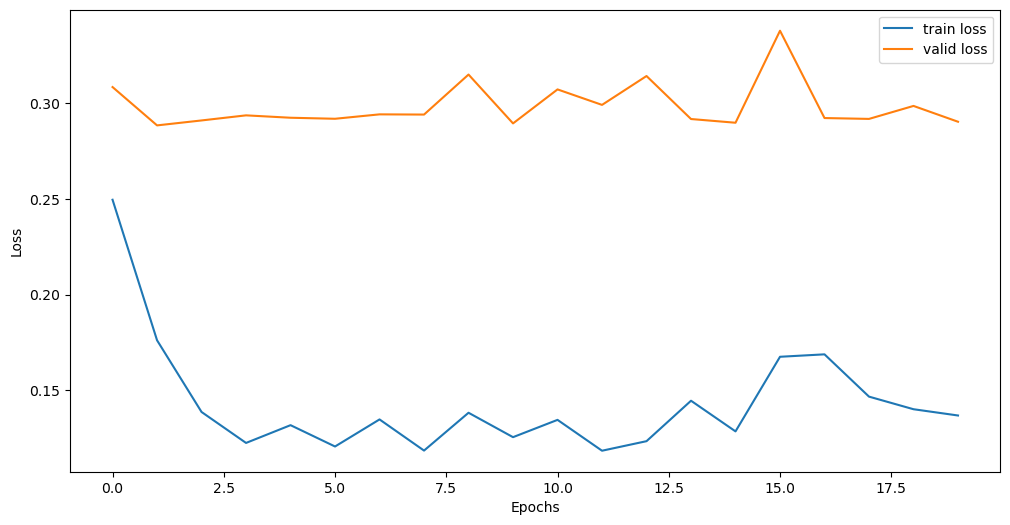

In [78]:
# plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='train loss')
plt.plot(valid_losses, label='valid loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

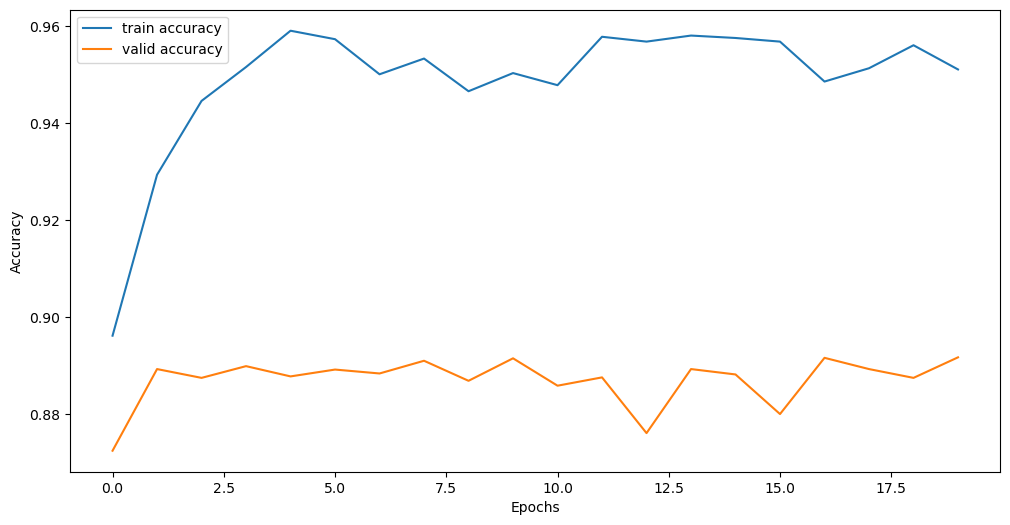

In [79]:
# plot the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(train_accs, label='train accuracy')
plt.plot(valid_accs, label='valid accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [80]:
print("best_loss_eval: ", best_loss_eval)

best_loss_eval:  0.2882953580373373


In [81]:
## Test the model
test_dataset = to_map_style_dataset(prepare_dataset(test_df))
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_batch)

test_acc, test_loss = evaluate(model, criterion, test_loader, device)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

Test accuracy: 0.8897177419354839, Test loss: 0.27772422660237706


In [84]:
torch.save(vocabulary, "vocab_textCNN.pth")


In [87]:
test = torch.load("vocab_textCNN.pth")
test.get_stoi()

{'mình': 4,
 'gì': 66,
 'chảy': 993,
 '.': 3,
 'khô': 342,
 'dưới': 388,
 'rồi': 62,
 'súp': 737,
 'nữa': 60,
 'chuyện': 707,
 'mơ': 700,
 'này': 35,
 'tuy': 417,
 'combo': 492,
 'đèn': 948,
 '<unk>': 0,
 'nước': 72,
 'vô': 211,
 'không': 5,
 'của': 48,
 'mặn': 346,
 '<pad>': 1,
 'tầng': 240,
 ',': 2,
 'khá': 39,
 'mọi': 245,
 ';': 455,
 'nè': 703,
 'đây': 21,
 'kết': 861,
 'và': 12,
 'no': 188,
 'nữ': 882,
 'nếm': 809,
 'ăn': 6,
 'có': 7,
 'bài': 654,
 'lần': 38,
 'hihi': 744,
 ':': 8,
 'quán': 9,
 'không_thể': 477,
 'đến': 36,
 'món': 24,
 'là': 10,
 'trân_châu': 765,
 'chung': 404,
 'thì': 11,
 'người': 74,
 'đặt': 308,
 'cũng': 13,
 'free': 588,
 'từng': 324,
 'quá': 46,
 'ngon': 14,
 'nước_mắm': 984,
 'hoài': 764,
 'ở': 25,
 '́': 15,
 'cho': 32,
 'xôi': 502,
 'mà': 23,
 'sài_gòn': 989,
 'suất': 706,
 'mùi_vị': 568,
 'rất': 16,
 '50k': 665,
 '̀': 17,
 'nhưng': 18,
 'tóm_lại': 839,
 'nên': 19,
 ')': 20,
 'khó': 326,
 'thanh_toán': 922,
 'chén': 503,
 'nhìn_chung': 905,
 'sinh_nhật':

In [88]:
model_loaded = torch.load(save_model + "/textCNN_best_model.pt")
model_loaded

OrderedDict([('embedding.weight',
              tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
                      [ 1.7296, -1.1209, -1.0091,  ...,  0.7036,  1.8854, -0.1967],
                      [ 0.9080, -0.2692, -0.1144,  ..., -0.8882, -0.2626, -0.4553],
                      ...,
                      [-1.0551, -1.0626, -1.1504,  ..., -0.5115,  0.1068, -1.0188],
                      [ 1.8321, -0.1699, -0.6155,  ...,  1.5489,  1.0440,  0.8671],
                      [-0.1939,  0.7997,  0.5947,  ..., -0.5255, -0.5999,  0.5874]])),
             ('conv.0.weight',
              tensor([[[ 1.6359e-02,  1.2142e-02],
                       [-1.9987e-03,  4.6528e-02],
                       [ 9.3783e-02, -8.6526e-02],
                       ...,
                       [-7.1771e-03, -4.8447e-03],
                       [-3.8817e-02,  2.2572e-02],
                       [ 3.4391e-03,  4.6408e-05]],
              
                      [[ 2.3744e-02, -5.3447e-02],
